# Pattern Recognition Exercise

In [94]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Part 1: Data Cleaning and Preprocessing

In [95]:
# Read the Dataset
data = pd.read_csv('housing.csv')

In [96]:
# Print first 5 rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [97]:
# Identify The Categorical And The Numerical Values Of The Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Based on the information above, we can conclude that every column in the dataset is numerical (float64), except of the last column, which is categorical (string).

In [98]:
# Normalize the dataset, in order for all data to be in the same scale

sc = StandardScaler() # instantiate a scaler's object

# Column "ocean_proximity" is not scaled because it contains categorical values
data_scaled = sc.fit_transform(data.drop("ocean_proximity",axis=1)) 

In [99]:
# print the scaled dataset
data_scaled = pd.DataFrame(data=data_scaled,columns=data.columns[0:-1])
data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900


In [100]:
# One - Hot encoding of the only categorical attribute 'ocean_proximity'
vector = pd.get_dummies(data['ocean_proximity'])

In [101]:
# Adding the new columns to the dataset
data = pd.concat([data_scaled,vector], axis=1)

In [102]:
# print new dataset (which is scaled and one-hot encoded)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1,0


In [103]:
# Subtitute the NaN values with the median-value of the column (in our case only for the column "total_bedrooms")
data.fillna(data.median(), inplace=True)

Now, the numerical attributes of the dataset are scaled and the categorical ones are One-Hot encoded. Also, all null values have been replaced with the Median value of each column.

In [104]:
# Delete outliers from the dataset using the IQR method
for x in data.columns[0:9]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [105]:
# Delete null values
data.dropna(inplace=True)

### Part 2: Visualization

<AxesSubplot:xlabel='longitude', ylabel='Count'>

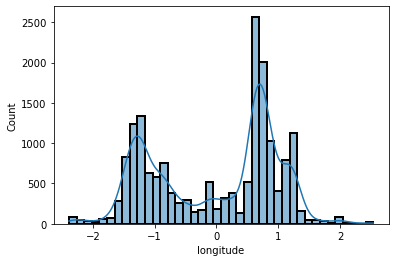

In [106]:
sns.histplot(data[data.columns[0]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='latitude', ylabel='Count'>

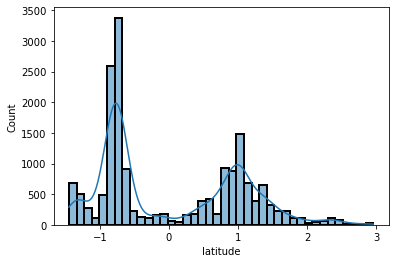

In [107]:
sns.histplot(data[data.columns[1]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

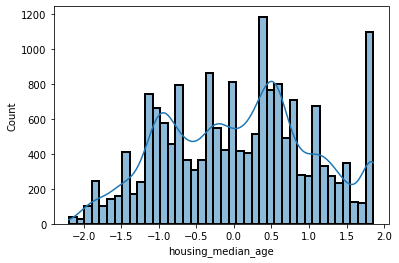

In [108]:
sns.histplot(data[data.columns[2]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

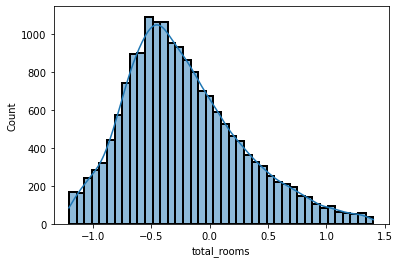

In [109]:
sns.histplot(data[data.columns[3]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

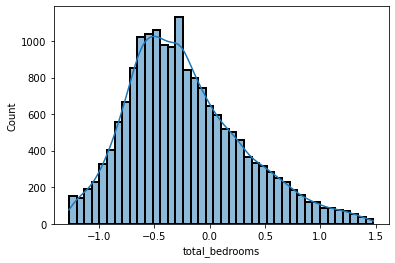

In [110]:
sns.histplot(data[data.columns[4]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='population', ylabel='Count'>

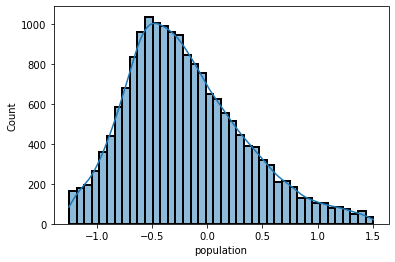

In [111]:
sns.histplot(data[data.columns[5]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='households', ylabel='Count'>

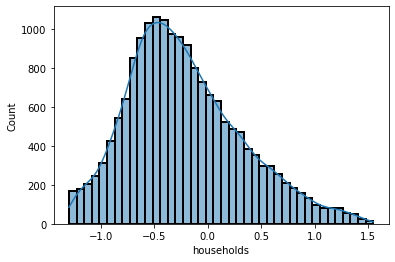

In [112]:
sns.histplot(data[data.columns[6]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

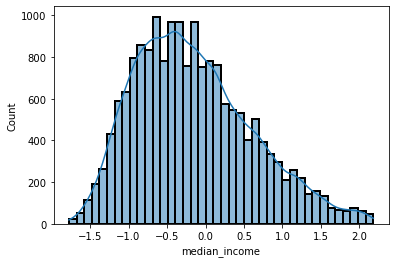

In [113]:
sns.histplot(data[data.columns[7]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

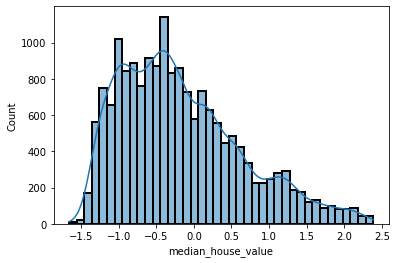

In [114]:
sns.histplot(data[data.columns[8]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='<1H OCEAN', ylabel='Count'>

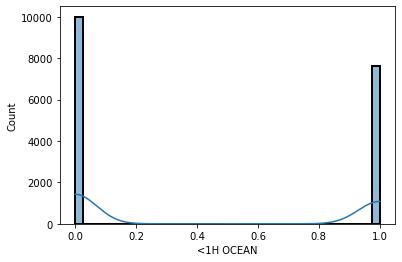

In [115]:
sns.histplot(data[data.columns[9]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='INLAND', ylabel='Count'>

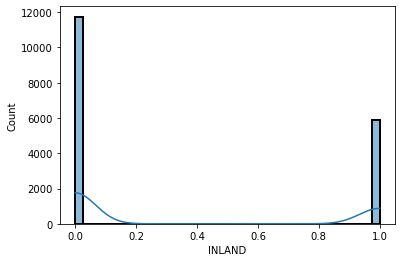

In [116]:
sns.histplot(data[data.columns[10]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='ISLAND', ylabel='Count'>

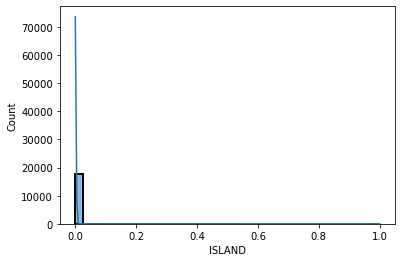

In [117]:
sns.histplot(data[data.columns[11]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='NEAR BAY', ylabel='Count'>

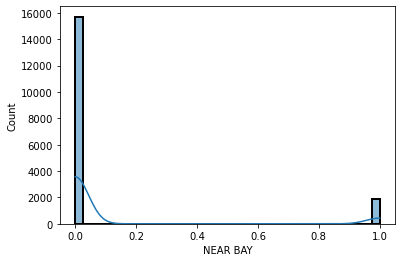

In [118]:
sns.histplot(data[data.columns[12]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='NEAR OCEAN', ylabel='Count'>

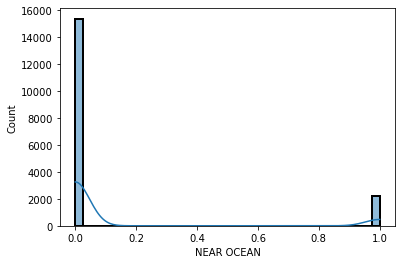

In [119]:
sns.histplot(data[data.columns[13]],bins=40,kde=True,lw=2)

<AxesSubplot:>

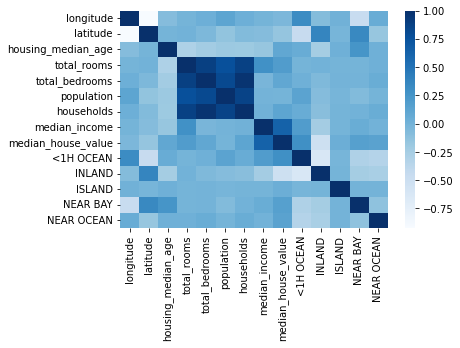

In [128]:
# Generate correlation heatmap
sns.heatmap(data=data.corr(),cmap='Blues')

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

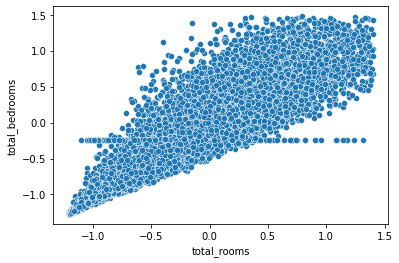

In [153]:
sns.scatterplot(x=data['total_rooms'],y=data['total_bedrooms'])

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

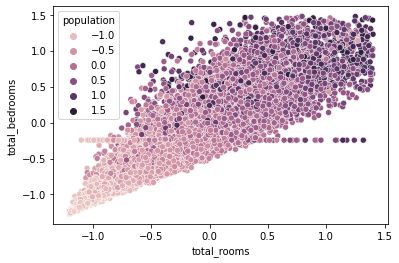

In [154]:
sns.scatterplot(x=data['total_rooms'],y=data['total_bedrooms'],hue=data['population'])

<AxesSubplot:xlabel='population', ylabel='households'>

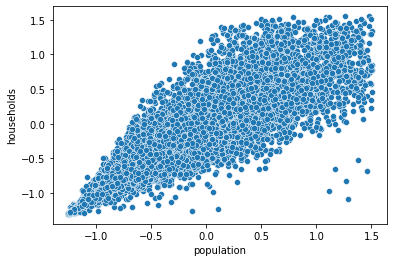

In [158]:
sns.scatterplot(x=data['population'],y=data['households'])

<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>

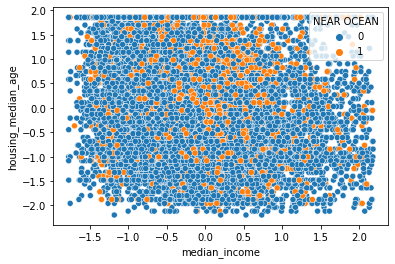

In [161]:
sns.scatterplot(x=data['median_income'],y=data['housing_median_age'],hue=data['NEAR OCEAN'])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

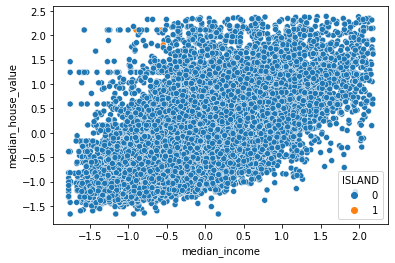

In [172]:
sns.scatterplot(x=data['median_income'],y=data['median_house_value'],hue=data['ISLAND'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

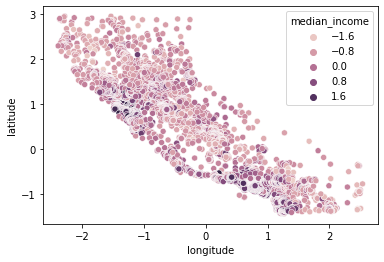

In [174]:
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['median_income'])